In [1]:
import pandas as pd  
from scan_spectrolyser import scan_helpers
from scan_spectrolyser import no3_calibrations
import matplotlib.pyplot as plt

# Field Visit Spectra Plotting

In [2]:
rme = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-6-24 Reynolds Site Visit/2024-08-06_reynoldseast_10mm.fp')
dobson = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-6-24 Reynolds Site Visit/2024-08-06-dobson-10mm.fp')
tollgate = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-6-24 Reynolds Site Visit/2024-08-06-tollgate-10mm.fp')


Text(0.5, 1.0, '5mm OPL Spectra from Field Visit')

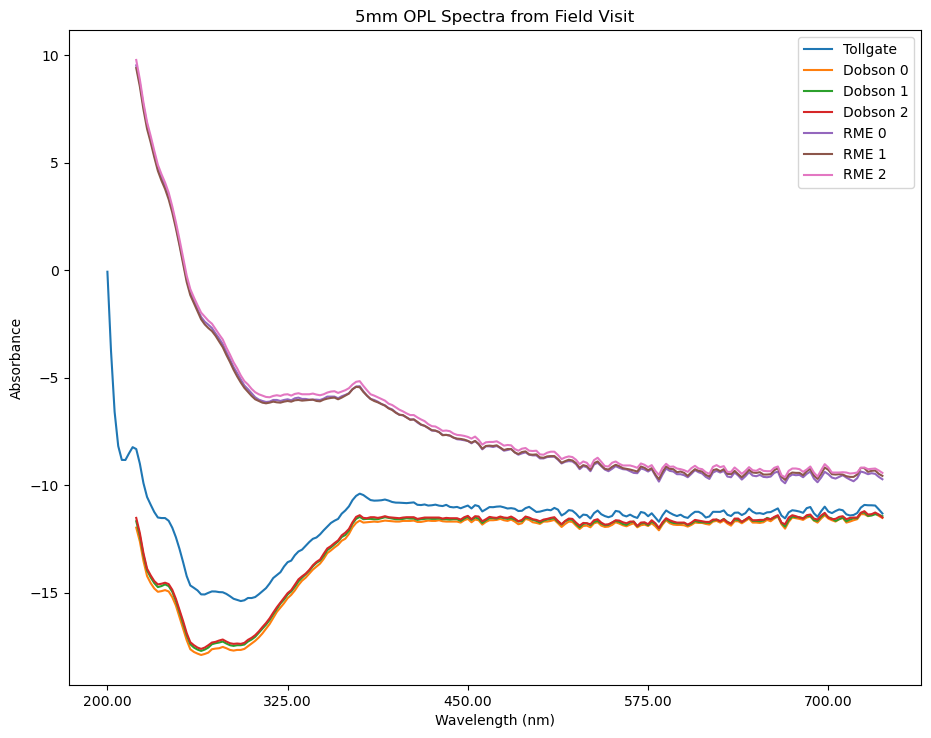

In [3]:
fig, ax = plt.subplots(figsize = (11,8.5))
scan_helpers.plot_scan_fp(tollgate,0, ax= ax, label= 'Tollgate')
scan_helpers.plot_scan_fp(dobson,range(0,3), ax= ax, label= ['Dobson 0', 'Dobson 1', 'Dobson 2'])

scan_helpers.plot_scan_fp(rme,range(0,3), ax= ax, label= ['RME 0','RME 1', 'RME 2'])

ax.set_title('5mm OPL Spectra from Field Visit')

In [4]:
rme_5mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-rme-5mm.fp')
dobson_5mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-dobson-5mm.fp')
tollgate_5mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-tollgate-5mm.fp')
rme_35mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-rme-35mm.fp')
dobson_35mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-dobson-35mm.fp')
tollgate_35mm = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-7-24 S-CAN LOD/2024-08-07-tollgate-35mm.fp')



Text(0.5, 1.0, 'Spectra for Water Samples Collected at RCEW 8-6-24, 5mm OPL')

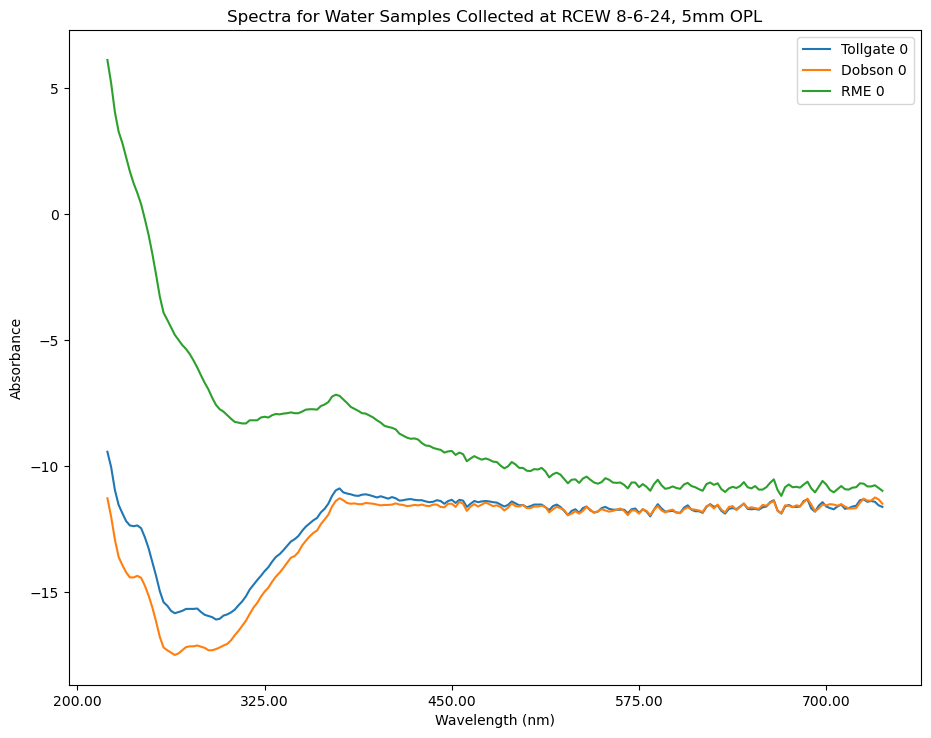

In [5]:
fig2, ax2 = plt.subplots(figsize=(11,8.5))

scan_helpers.plot_scan_fp(tollgate_5mm,range(0,1), ax= ax2, label= [f"Tollgate {i}" for i in range(0, 1)])
scan_helpers.plot_scan_fp(dobson_5mm,range(0,1), ax= ax2, label= [f"Dobson {i}" for i in range(0, 1)])
scan_helpers.plot_scan_fp(rme_5mm,range(0,1), ax= ax2, label= [f"RME {i}" for i in range(0, 1)])

ax2.set_title("Spectra for Water Samples Collected at RCEW 8-6-24, 5mm OPL")

- slight differences in absorbance spectra.
- similar shape to field samples

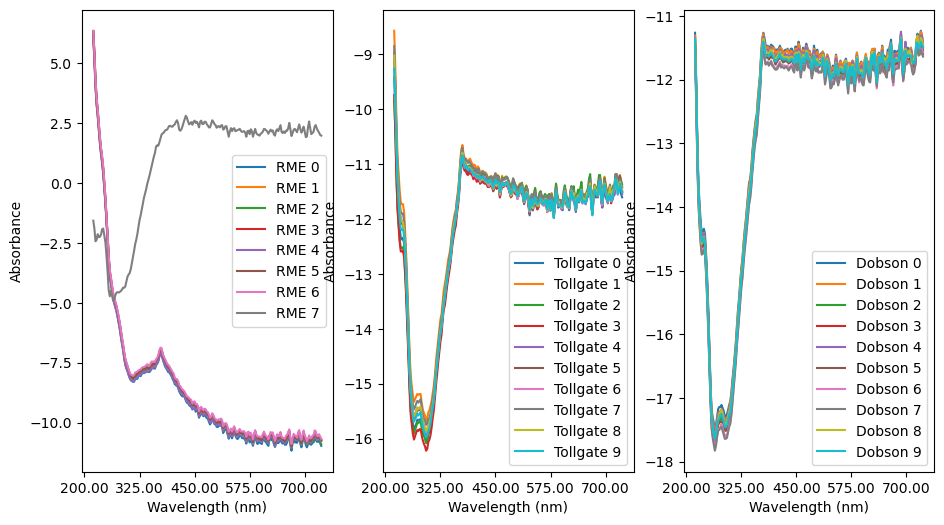

In [6]:
fig2, ax2 = plt.subplots(ncols = 3, figsize=(11,6))

scan_helpers.plot_scan_fp(rme_5mm,range(0,8), ax= ax2[0], label= [f"RME {i}" for i in range(0, 8)])
scan_helpers.plot_scan_fp(tollgate_5mm,range(0,10), ax= ax2[1], label= [f"Tollgate {i}" for i in range(0, 10)])
scan_helpers.plot_scan_fp(dobson_5mm,range(0,10), ax= ax2[2], label= [f"Dobson {i}" for i in range(0, 10)])

#ax2.set_title("Spectra for Water Samples Collected at RCEW 8-6-24, 5mm OPL")

- so tollgate and dobson spectra are all nice and consistent
- RME spectra get messed up and differentr from 7 on - I'm going to assume this is from the flow cell draining

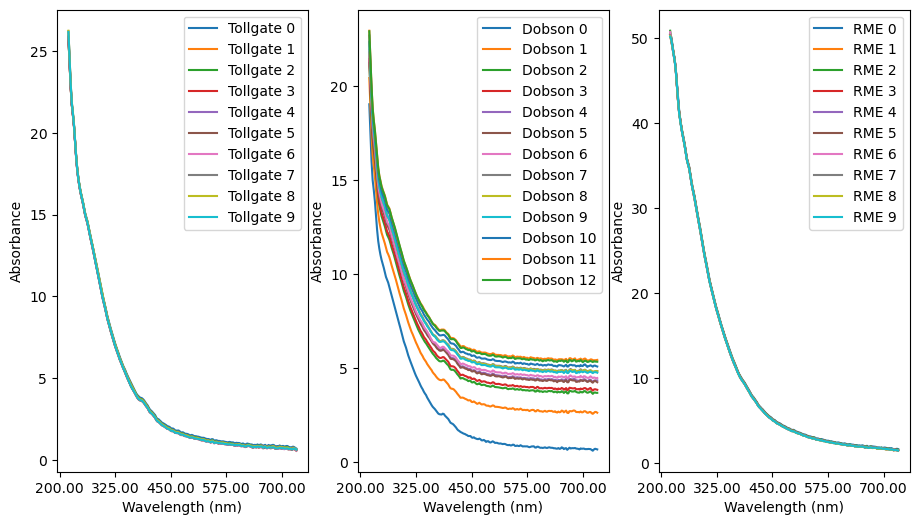

In [7]:
fig3, ax3 = plt.subplots(ncols=3, figsize=(11,6))

scan_helpers.plot_scan_fp(tollgate_35mm,range(0,10), ax= ax3[0], label= [f"Tollgate {i}" for i in range(0, 10)])
scan_helpers.plot_scan_fp(dobson_35mm,range(0,13), ax= ax3[1], label= [f"Dobson {i}" for i in range(0, 13)])
scan_helpers.plot_scan_fp(rme_35mm,range(0,10), ax= ax3[2], label= [f"RME {i}" for i in range(0, 10)])

#ax3.set_title("Spectra for Water Samples Collected at RCEW 8-6-24, 35mm OPL")

- RME and tollgate spectra are nice and consistent
- for some reason the dobson spectra drifts. could it be a temperture thign? have to wait for it to warm up?

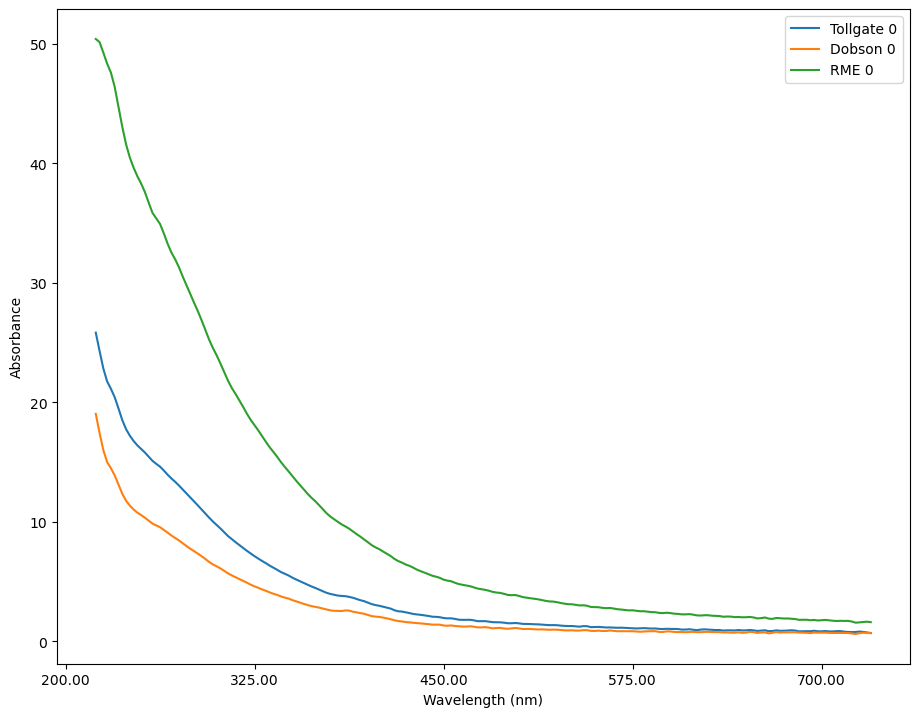

In [8]:
fig4, ax4 = plt.subplots(figsize=(11,8.5))

scan_helpers.plot_scan_fp(tollgate_35mm,range(0,1), ax= ax4, label= [f"Tollgate {i}" for i in range(0, 1)])
scan_helpers.plot_scan_fp(dobson_35mm,range(0,1), ax= ax4, label= [f"Dobson {i}" for i in range(0, 1)])
scan_helpers.plot_scan_fp(rme_35mm,range(0,1), ax= ax4, label= [f"RME {i}" for i in range(0, 1)])

#ax3.set_title("Spectra for Water Samples Collected at RCEW 8-6-24, 35mm OPL")

- spectra are all slightly different but have same basic shape
- these spectra look somewhat different than nitrate spectra in DI water - nitrate peak (if that's what it is) is much wider
        - this is probably due to CDOM! CDOM has an exponentially decreasing spectra. RME has highest CDOM just visually, so this makes sense.
- what is blank 35mm spectra in air?

# Accuracy & Recovery Calculation

In [204]:
def get_lab_results_for_site(basepath, filename, site):
    # Load the Excel sheet
    dfs = pd.read_excel(basepath + filename, sheet_name=None)
    df = dfs[site + ' recovery']

    # Create the MultiIndex for rows (site and spike)
    row_index = pd.MultiIndex.from_product(
        [[site], df['Spike Concentration (uM)'].unique()],
        names=['site', 'spike']
    )

    # Create the MultiIndex for columns (calibration and statistic)
    col_index = pd.MultiIndex.from_product(
        [['Lab'], ['Mean', 'Std', 'LOD', 'Recovery', '% Recovery', 'Error', '% Error']],
        names=['calibration', 'statistic']
    )

    # Initialize the DataFrame with the indices
    result = pd.DataFrame(columns=col_index, index=row_index)

    # Calculate the mean and reindex it to match the DataFrame's index
    mean_series = df.groupby('Spike Concentration (uM)').mean()['Results (uM)']
    mean_series = mean_series.reindex(df['Spike Concentration (uM)'].unique(), level='spike')
    mean_series.index = pd.MultiIndex.from_product([[site], mean_series.index], names=['site', 'spike'])
    
    result.loc[:, ('Lab', 'Mean')] = mean_series

    # Calculate the standard deviation and reindex it to match the DataFrame's index
    std_series = df.groupby('Spike Concentration (uM)').std()['Results (uM)']
    std_series.index = pd.MultiIndex.from_product([[site], std_series.index], names=['site', 'spike'])
    result.loc[:, ('Lab', 'Std')] = std_series

    # Calculate and insert the LOD values (3 times the std)
    result.loc[:, ('Lab', 'LOD')] = 3 * std_series

    # Calculate the recovery and reindex it to match the DataFrame's index
    recovery_series = df.groupby('Spike Concentration (uM)').mean()['Recovery (uM)']
    recovery_series.index = pd.MultiIndex.from_product([[site], recovery_series.index], names=['site', 'spike'])
    result.loc[:, ('Lab', 'Recovery')] = recovery_series

    # Calculate the % recovery and reindex it to match the DataFrame's index
    pct_recovery_series = df.groupby('Spike Concentration (uM)').mean()['Recovery (%)']
    pct_recovery_series.index = pd.MultiIndex.from_product([[site], pct_recovery_series.index], names=['site', 'spike'])
    result.loc[:, ('Lab', '% Recovery')] = pct_recovery_series
    
    return result




In [205]:
def calculate_recovery_for_site(basepath, sites, spikes, sensor, calibrations, calibrations_kwargs, lab_results_path, lab_results_filename):
    statistics = ['Mean', 'Std', 'LOD', 'Recovery', '% Recovery', 'Error', '% Error']
    row_index = pd.MultiIndex.from_product([sites, spikes], names=['site', 'spike'])
    calibration_names = [calibration.__name__ for calibration in calibrations]
    calibration_names.append('Lab')
    column_index = pd.MultiIndex.from_product([calibration_names, statistics], names=['calibration', 'statistic'])
    result = pd.DataFrame(columns=column_index, index=row_index)

    for site in sites:
        result.loc[(site, slice(None)),('Lab', slice(None))] = get_lab_results_for_site(lab_results_path, lab_results_filename, site)
        for spike in spikes:
            path = basepath + site+ '-' + str(spike) + '-' + sensor+'.fp'
            df = scan_helpers.import_scan_fp(path)
            df = scan_helpers.apply_calibrations(df, calibrations, calibrations_kwargs)
            for calibration in calibrations:
                result.loc[(site, spike), (calibration.__name__, 'Mean')] = df[calibration.__name__+'_no3'].mean()
                result.loc[(site, spike), (calibration.__name__, 'Std')] = df[calibration.__name__+'_no3'].std()
                result.loc[(site, spike), (calibration.__name__, 'LOD')] = 3*df[calibration.__name__+'_no3'].std()
                result.loc[(site, spike), (calibration.__name__, 'Recovery')] = result.loc[(site, spike), (calibration.__name__, 'Mean')]-result.loc[(site, 0), (calibration.__name__, 'Mean')] - spike
                result.loc[(site, spike), (calibration.__name__, '% Recovery')] = (result.loc[(site, spike), (calibration.__name__, 'Mean')]-result.loc[(site, 0), (calibration.__name__, 'Mean')])/spike*100
                result.loc[(site, spike), (calibration.__name__, 'Error')] = (result.loc[(site, spike), (calibration.__name__, 'Mean')]-result.loc[(site, spike), ('Lab', 'Mean')])
                result.loc[(site, spike), (calibration.__name__, '% Error')] = (result.loc[(site, spike), (calibration.__name__, 'Mean')]-result.loc[(site, spike), ('Lab', 'Mean')])/result.loc[(site, spike), ('Lab', 'Mean')]*100
    return result


In [206]:
get_lab_results_for_site('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-6-24 Reynolds Site Visit/', 'RCEW_nitrate_tests_08Aug24.xlsx', 'dobson')

/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_17215/3504830819.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_series = df.groupby('Spike Concentration (uM)').mean()['Results (uM)']
/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_17215/3504830819.py:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, ('Lab', 'Mean')] = mean_series
/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_17215/3504830819.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_o

calibration         Lab                                                  \
statistic          Mean       Std       LOD   Recovery % Recovery Error   
site   spike                                                              
dobson 0      11.071429       NaN       NaN        NaN        NaN   NaN   
       100    94.000000       NaN       NaN -17.071429   0.829286   NaN   
       50     52.392857  0.050508  0.151523  -8.678571   0.826429   NaN   
       10     19.142857       NaN       NaN  -1.928571   0.807143   NaN   
       5      15.071429       NaN       NaN  -1.000000   0.800000   NaN   
       1      11.857143       NaN       NaN  -0.214286   0.785714   NaN   

calibration           
statistic    % Error  
site   spike          
dobson 0         NaN  
       100       NaN  
       50        NaN  
       10        NaN  
       5         NaN  
       1         NaN

In [213]:
result_35mm = calculate_recovery_for_site('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/S-CAN Recovery and LOD Experiments/', ['dobson', 'rme', 'tollgate'], [0,1,5,10,50,100], '35mm', [no3_calibrations.one_wavelength, no3_calibrations.two_wavelength, no3_calibrations.second_derivative], {no3_calibrations.second_derivative: {'slope': 41.42, 'intercept': 1.03}, no3_calibrations.two_wavelength: {'slope': 3.69, 'intercept': -.98}, no3_calibrations.one_wavelength: {'slope': 3.26, 'intercept': 0.33}}, '/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-6-24 Reynolds Site Visit/', 'RCEW_nitrate_tests_08Aug24.xlsx')
result_5mm = calculate_recovery_for_site('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/S-CAN Recovery and LOD Experiments/', ['dobson', 'rme', 'tollgate'], [0,1,5,10,50,100], '5mm', [no3_calibrations.one_wavelength, no3_calibrations.two_wavelength, no3_calibrations.second_derivative], {no3_calibrations.second_derivative: {'slope': 41.42, 'intercept': 1.03}, no3_calibrations.two_wavelength: {'slope': 3.69, 'intercept': -.98}, no3_calibrations.one_wavelength: {'slope': 3.26, 'intercept': 0.33}}, '/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-6-24 Reynolds Site Visit/', 'RCEW_nitrate_tests_08Aug24.xlsx')

/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_17215/3504830819.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_series = df.groupby('Spike Concentration (uM)').mean()['Results (uM)']
/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_17215/3504830819.py:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  result.loc[:, ('Lab', 'Mean')] = mean_series
/var/folders/r9/ggs_7vq13gs5mb84nc3d770c0000gp/T/ipykernel_17215/3504830819.py:29: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_o

In [211]:
result_35mm.loc[:, ('Lab', slice(None))]

calibration           Lab                                                  \
statistic            Mean       Std       LOD   Recovery % Recovery Error   
site     spike                                                              
dobson   0      11.071429       NaN       NaN        NaN        NaN   NaN   
         1      11.857143       NaN       NaN  -0.214286   0.785714   NaN   
         5      15.071429       NaN       NaN       -1.0        0.8   NaN   
         10     19.142857       NaN       NaN  -1.928571   0.807143   NaN   
         50     52.392857  0.050508  0.151523  -8.678571   0.826429   NaN   
         100         94.0       NaN       NaN -17.071429   0.829286   NaN   
rme      0       2.142857       NaN       NaN        NaN        NaN   NaN   
         1       3.571429       NaN       NaN   0.428571   1.428571   NaN   
         5       6.928571       NaN       NaN  -0.214286   0.957143   NaN   
         10     11.214286       NaN       NaN  -0.928571   0.907143   NaN   
         50     44.821429  0.050508  0.151523  -7.321429   0.853571   NaN   
         100    85.714286       NaN       NaN -16.428571   0.835714   NaN   
tollgate 0            8.0       NaN       NaN        NaN        NaN   NaN   
         1            9.0       NaN       NaN        0.0        1.0   NaN   
         5            NaN       NaN       NaN        NaN        NaN   NaN   
         10     16.642857  0.202031  0.606092  -1.357143   0.864286   NaN   
         50          50.0       NaN       NaN       -8.0       0.84   NaN   
         100    89.214286       NaN       NaN -18.785714   0.812143   NaN   

calibration             
statistic      % Error  
site     spike          
dobson   0         NaN  
         1         NaN  
         5         NaN  
         10        NaN  
         50        NaN  
         100       NaN  
rme      0         NaN  
         1         NaN  
         5         NaN  
         10        NaN  
         50        NaN  
         100       NaN  
tollgate 0         NaN  
         1         NaN  
         5         NaN  
         10        NaN  
         50        NaN  
         100       NaN

In [214]:
result_35mm.to_excel('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/S-CAN Recovery and LOD Experiments/result_35mm.xlsx', index=True)
result_5mm.to_excel('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/S-CAN Recovery and LOD Experiments/result_5mm.xlsx', index=True)